# Lab 9: 聚类 - 商场顾客细分

In [1]:
import os
import sys
import pandas as pd

path = os.path.dirname(os.getcwd())
sys.path.append(path)

from common.filesio import FilesIO

data = pd.read_csv(FilesIO.getLectureData('Mall_Customers.csv'), index_col=0, encoding="utf-8") 

In [2]:
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
data.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

## 注意：无监督学习通常不需要将数据拆分成训练集和测试集，使用所有数据

In [4]:
X = pd.get_dummies(data, drop_first = True, dtype=float)

In [5]:
X.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
CustomerID,,,,
1,19,15,39,1.0
2,21,15,81,1.0
3,20,16,6,0.0
4,23,16,77,0.0
5,31,17,40,0.0


## 1. K均值聚类

### 使用函数KMeans()

KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


主要参数：

$\bullet$ n_clusters：（整数，默认值为8）是要形成的聚类个数。

$\bullet$ init：用于确定K-means聚类算法的初始化方法。它可以采用以下几种方式：

'k-means++'：使用基于样本对总惯性的贡献的经验概率分布进行抽样，选择初始聚类质心。这种方法可以加快收敛速度。算法实现的是"贪婪k-means++"。它与普通的k-means++不同之处在于，在每个抽样步骤中进行多次尝试，并从中选择最佳质心。

'random'：从数据中随机选择n_clusters个观察值（行）作为初始质心。

如果传递了一个数组，它应该具有形状为(n_clusters, n_features)，用于指定初始中心。

如果传递的是一个可调用对象，它应该接受参数X、n_clusters和一个随机状态，并返回一个初始化方法。

根据不同的需求和数据特征，可以选择合适的初始化方法。默认值为'k-means++'。

$\bullet$ max_iter：K-means算法单次运行的最大迭代次数。

$\bullet$ tol：相对容差，与两次迭代之间聚类中心差异的Frobenius范数相关。当聚类中心的变化小于容差时，算法将宣布收敛。

这两个参数一起控制了K-means算法的收敛性和迭代次数。通过调整max_iter和tol的值，可以控制算法的运行时间和收敛精度。默认值为max_iter=300，tol=1e-4。

### 1.1 使用拐点法选择聚类个数K 

In [22]:
from sklearn.cluster import KMeans

WCSS = [] ## 簇内平方和
# km = KMeans(n_clusters=5, n_init='auto', random_state=0, algorithm='elkan').fit(X)
for i in range(2, 11): ## 从1到10中选择
    km = KMeans(n_clusters=i, n_init='auto', random_state=0, algorithm='elkan').fit(X)
    WCSS.append(km.inertia_) ## inertia_: 簇内平方和

In [23]:
WCSS

[213420.80306905368,
 143766.62423883352,
 105620.3951527712,
 82850.57876077862,
 58417.04487901159,
 51600.417932768985,
 44424.820895170895,
 40723.85486954906,
 38489.27173144533]

Text(0, 0.5, 'Inertia')

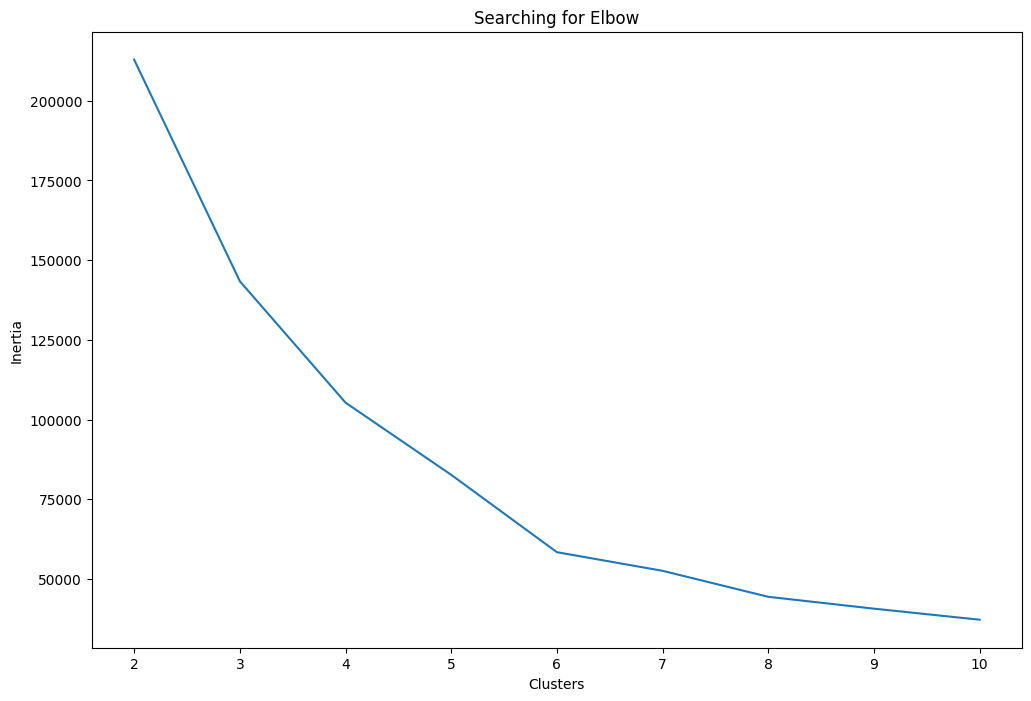

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
x_idx = np.arange(2, 11)
Y = np.array(WCSS)
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=x_idx, y=Y, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

### 1.2 拐点大概在K=5时，因此选择K=5 

In [9]:
# 5 cluster，在数据上拟合
model = KMeans(n_clusters=5, random_state = 100, algorithm='elkan').fit(X)

c:\Users\NUC\Desktop\GitsProject\MachineLearningStudy\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### K均值聚类计算出的类

In [10]:
model.labels_

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

### 在数据data上增加一列Cluster：K均值聚类计算出的类

In [11]:
X['Clusters'] = model.labels_

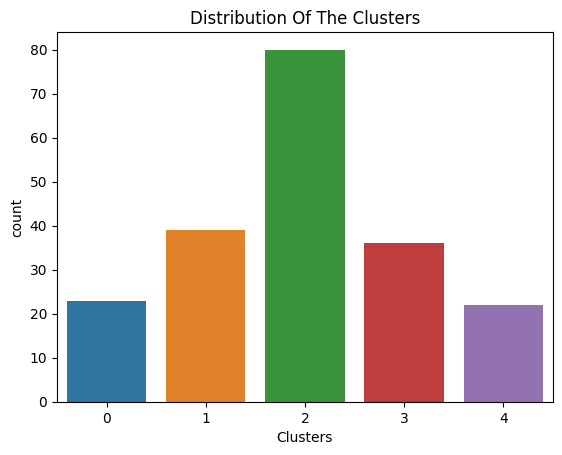

In [12]:
pl = sns.countplot(x = X["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

### 1.3 查看聚类的特点，与每个特征之间的关系

### 收入：类2、3中的顾客年收入最高（中位数为80K），类0中的顾客其次（中位数大概为50K），类1、4中的顾客年收入较低（中位数为20K多）

<AxesSubplot:xlabel='Clusters', ylabel='Annual Income (k$)'>

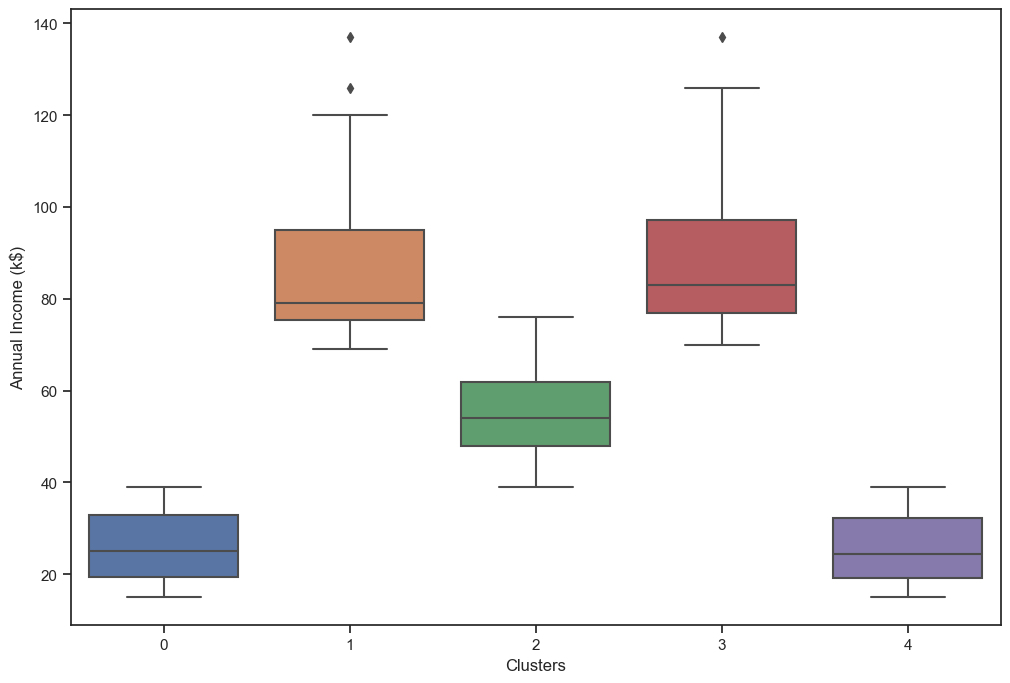

In [13]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('ticks') 
# style: dict, or one of {darkgrid, whitegrid, dark, white, ticks} A dictionary of parameters or the name of a preconfigured style.
sns.boxplot(x = "Clusters", y = "Annual Income (k$)", data = X) 

### 性别：类1、0中的顾客大部分为女性（60%左右），类2、3、4中顾客的男女比例较接近

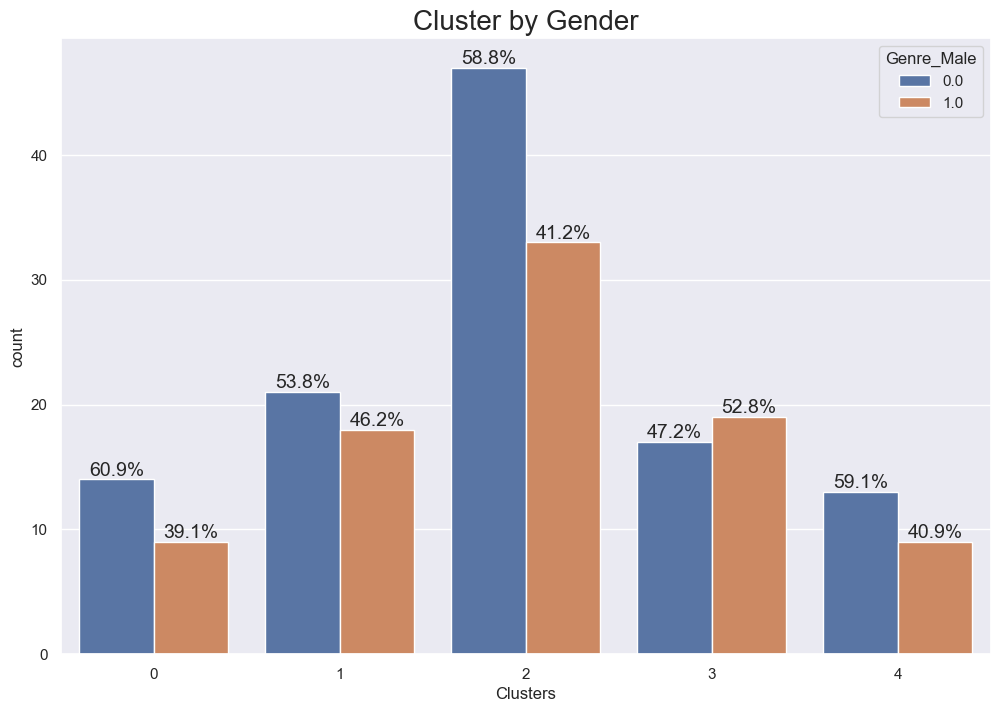

In [14]:
## 定义函数percentage_above_bar_relative_to_xgroup， 使得流失百分比显示在条形上方
# 在matplotlib和seaborn中，子地块称为“ax”。seaborn条形图中的条形图是有组织的，首先是属于第一个色调值的所有条形图，然后是第二个，以此类推。
def percentage_above_bar_relative_to_xgroup(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=14, ha='center', va='bottom')
            

sns.set(rc={'figure.figsize':(12,8)})

#total = data["gender"].value_counts()
ax = sns.countplot(x = "Clusters", hue = "Genre_Male", data = X)
percentage_above_bar_relative_to_xgroup(ax)

# 设置图片标题
plt.title('Cluster by Gender', fontsize=20)

    
plt.show()

### 年龄：类1、2的顾客年龄中位数在40岁以上，类3的顾客年龄中位数在30多，类4的顾客较年轻中位数为20多，类0中的顾客年龄范围较广。

<AxesSubplot:xlabel='Clusters', ylabel='Age'>

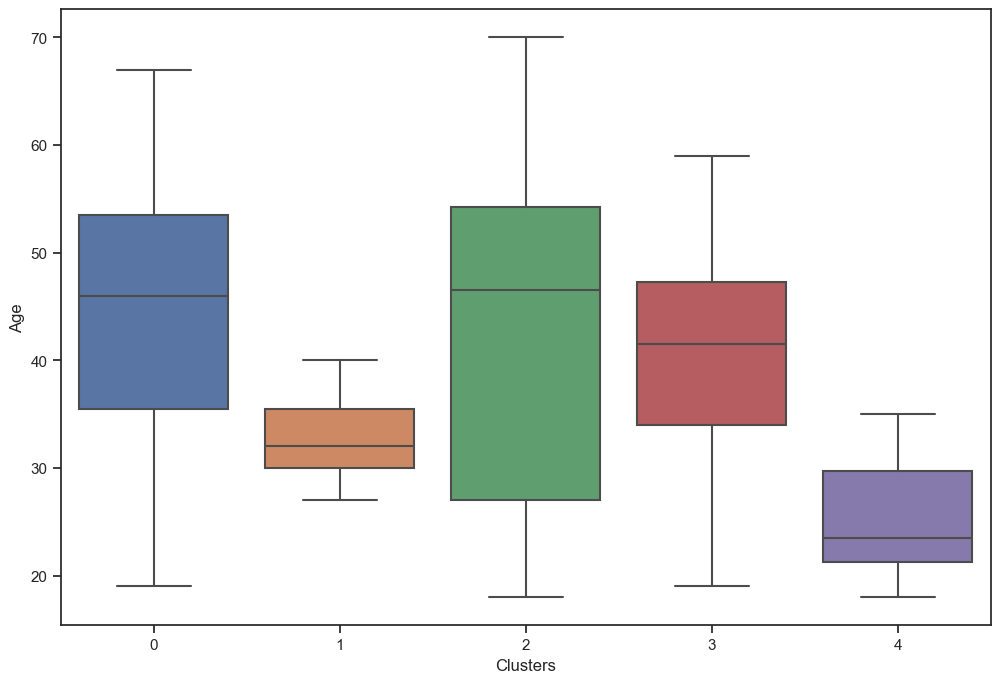

In [15]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('ticks') 
# style: dict, or one of {darkgrid, whitegrid, dark, white, ticks} A dictionary of parameters or the name of a preconfigured style.
sns.boxplot(x = "Clusters", y = "Age", data = X) 

### 消费评分：类3、4的顾客评分最高（80分左右），类0的顾客其次（50多分），类1、2的顾客评分较低（中位数低于20）

<AxesSubplot:xlabel='Clusters', ylabel='Spending Score (1-100)'>

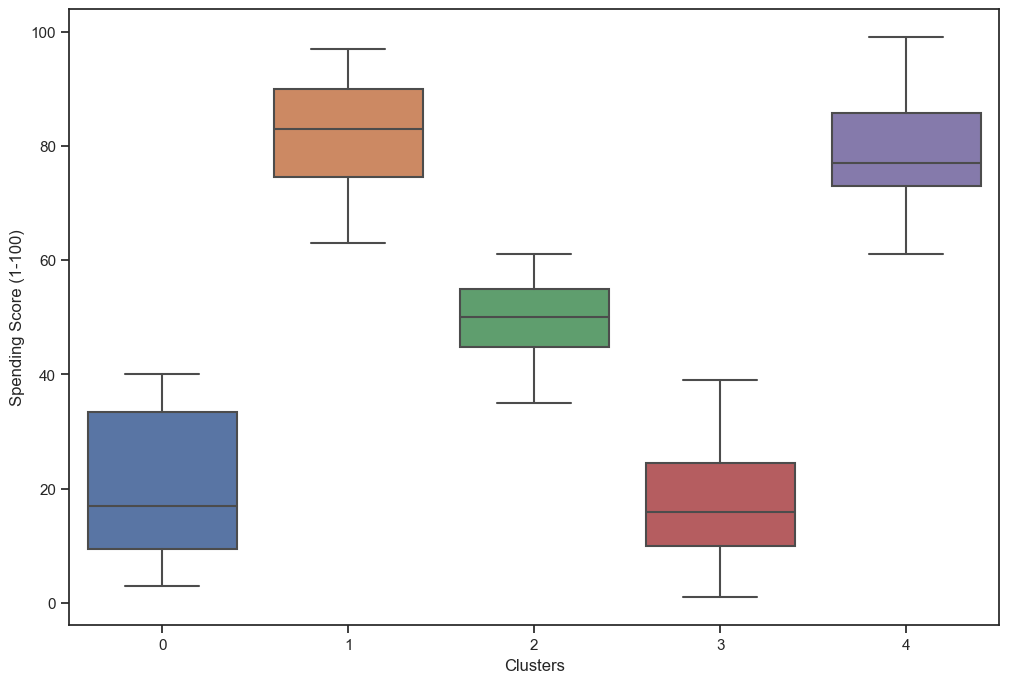

In [16]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('ticks') 
# style: dict, or one of {darkgrid, whitegrid, dark, white, ticks} A dictionary of parameters or the name of a preconfigured style.
sns.boxplot(x = "Clusters", y = "Spending Score (1-100)", data = X) 

### 总结：每个聚类的特点

### 类0：中等收入、消费评分中等
### 类1：低收入、消费评分低、年龄在40岁、女性居多
### 类2：高收入、消费评分低、年龄在40岁
### 类3：高收入、消费评分高、年龄在30岁左右
### 类4：低收入、消费评分高、年龄在20多岁、女性居多

### 1.4 查看聚类与年收入、消费评分之间的关系

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

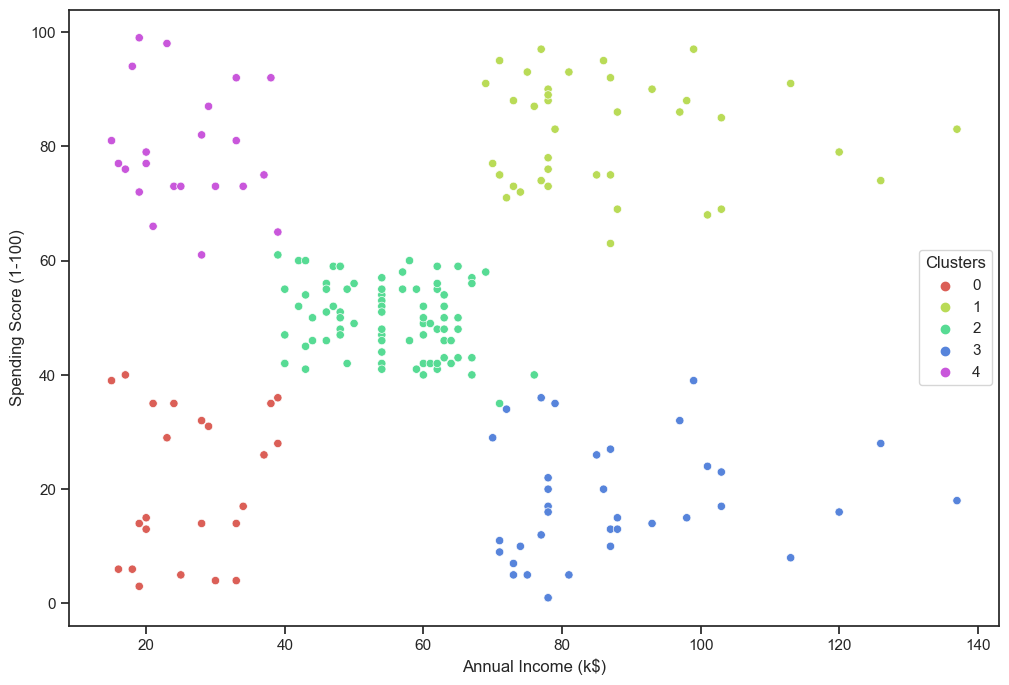

In [17]:
sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'], hue=X['Clusters'],palette=sns.color_palette('hls', 5))

## 2. 层次聚类（聚合聚类）

使用函数AgglomerativeClustering()

AgglomerativeClustering(n_clusters=2, *, affinity='deprecated', metric=None, memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

主要参数：

$\bullet$ n_clusters: 用于确定要查找的聚类数量。默认值为2。

在使用聚类算法时，可以指定要查找的聚类数量。如果已经知道要查找的聚类数量，可以将n_clusters设置为相应的值。如果不确定聚类数量，可以将n_clusters设置为None，并使用distance_threshold参数来控制聚类的阈值。

需要注意的是，n_clusters和distance_threshold参数不能同时为None。其中一个参数必须有值，用于确定聚类的方式。

$\bullet$ affinity：确定在特征数组中计算实例之间距离时要使用的度量方法。默认值为"euclidean"，即使用欧氏距离作为度量方法。如果affinity是一个字符串或可调用对象，它必须是sklearn.metrics.pairwise_distances允许的度量选项之一。如果linkage参数为"ward"，则只接受"euclidean"。如果affinity为"precomputed"，则fit方法需要输入一个距离矩阵（而不是相似度矩阵）。

在聚类算法中，距离度量方法对于确定实例之间的相似性和聚类结果非常重要。可以根据数据的特征和问题的要求选择适当的度量方法。常见的选项包括欧氏距离（"euclidean"）、曼哈顿距离（"manhattan"）、余弦相似度（"cosine"）等。

$\bullet$ metric：用于计算连接（linkage）的度量方法。可以选择以下度量方法之一："euclidean"（欧氏距离）、"l1"（曼哈顿距离）、"l2"（欧氏距离）、"manhattan"（曼哈顿距离）、"cosine"（余弦相似度）或"precomputed"（预先计算的距离矩阵）。如果将metric设置为None，则使用默认的"euclidean"度量方法。如果linkage参数为"ward"，则只接受"euclidean"度量方法。如果metric为"precomputed"，则fit方法需要输入一个距离矩阵。

度量方法用于计算数据点之间的相似度或距离，对于聚类算法的结果和性能具有重要影响。根据数据的特征和问题的要求，可以选择适当的度量方法。默认情况下，如果未提供metric参数，将使用"euclidean"作为度量方法。


$\bullet$ linkage：确定要使用的连接准则。连接准则决定了在观察集合之间使用哪种距离。算法将合并最小化此准则的聚类对。

以下是各种连接准则的说明：

'ward'：最小化合并的聚类的方差。

'average'：使用两个集合的每个观察值之间的平均距离。

'complete'或'maximum'：使用两个集合之间的最大距离。

'single'：使用两个集合之间的最小距离。

不同的连接准则将导致不同的聚类结果。根据问题的特性和要求，可以选择适当的连接准则。默认值为'ward'，它通过最小化合并的聚类的方差来选择合并的聚类对。

In [18]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)

In [19]:
agglom.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [20]:
X['agglom_Clusters'] = agglom.labels_

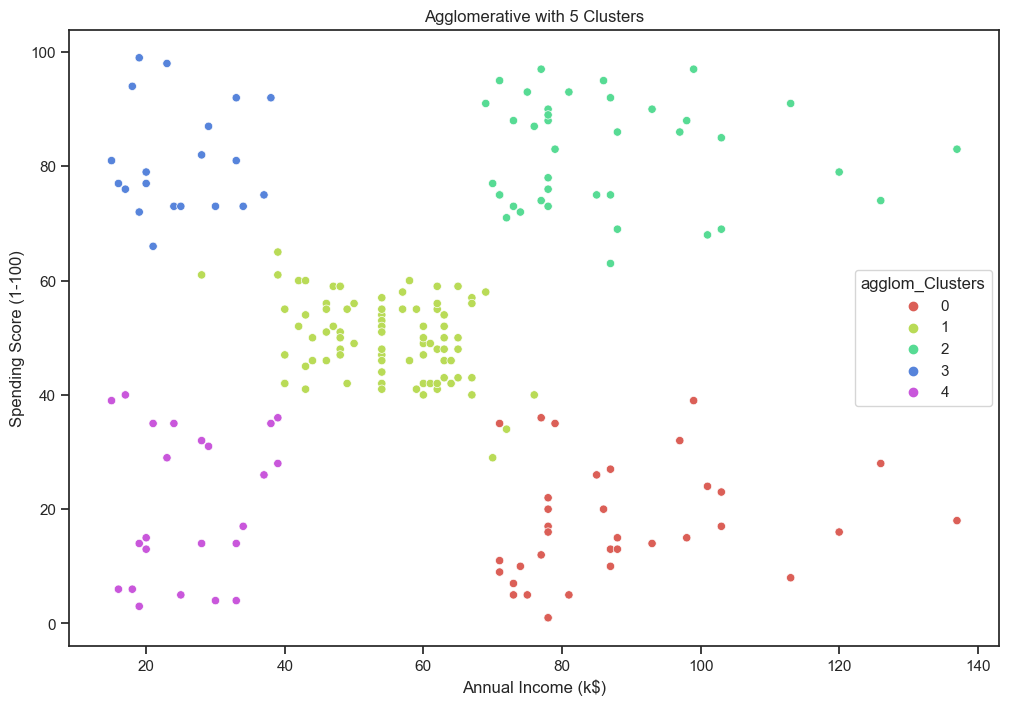

In [21]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'], hue=X['agglom_Clusters'],palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 5 Clusters')
plt.show()

### 类0：高收入、低消费评分
### 类1：中等收入、中等消费评分
### 类2：高收入、高消费评分
### 类3：低收入、高消费评分
### 类4：低收入、低消费评分